### Import des bibliothèques

In [25]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (11,7)

import pandas as pd

### LE JEU DE DONNEES

In [26]:
def tracer_graph(df,abs,hor,title):
    plt.title(title)
    df = df.sort_values(by=['Class']) 
    # pour chaque classe
    for cl in df.iloc[:,-1].unique():
        df_class = df.loc[ df["Class"] == cl]
        plt.scatter(df_class.iloc[:,abs],df_class.iloc[:,hor], label=cl,zorder=1)
        # Annotations du graphique
        plt.xlabel("colonne"+str(abs))
        plt.ylabel("colonne"+str(hor))   
        plt.legend()
        

In [27]:
def normalized(data):
    X = data.iloc[:,:-1]
    temp = X.sub(X.mean()) # Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs
    data.iloc[:,:-1] = temp.div(temp.std())
    return data


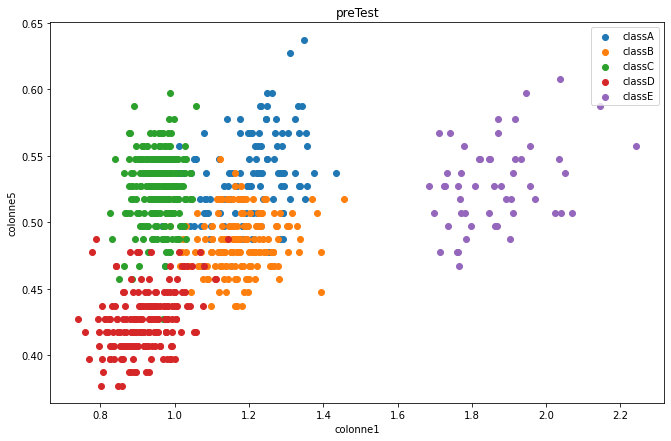

In [28]:
#A SUPPR
tracer_graph(pd.read_csv("preTest.csv",header=None,names=[0,1,2,3,4,5,"Class"]),1,5,"preTest")

#### Importation

In [29]:
data = normalized(pd.read_csv("data.csv",header=None,names=[0,1,2,3,4,5,"Class"]))
print(data.shape)
data.head(2)

(803, 7)


,0,1,2,3,4,5,Class
0,0.469594,0.401832,0.573743,0.537885,-1.018685,-0.354654,classB
1,0.396267,0.149243,0.759515,0.362735,0.657553,-0.564210,classB


In [30]:
preTest =  normalized(pd.read_csv("preTest.csv",header=None,names=[0,1,2,3,4,5,"Class"]))
print(preTest.shape)
preTest.head(2)

(803, 7)


,0,1,2,3,4,5,Class
0,0.984902,0.963990,0.218928,1.068050,0.622794,0.047443,classB
1,-0.868667,-0.585987,-0.323661,-0.736667,0.622794,0.454893,classC


In [31]:
DF_TOTAL = pd.concat([data,preTest])
DF_TOTAL.shape

(1606, 7)

#### Visualisation

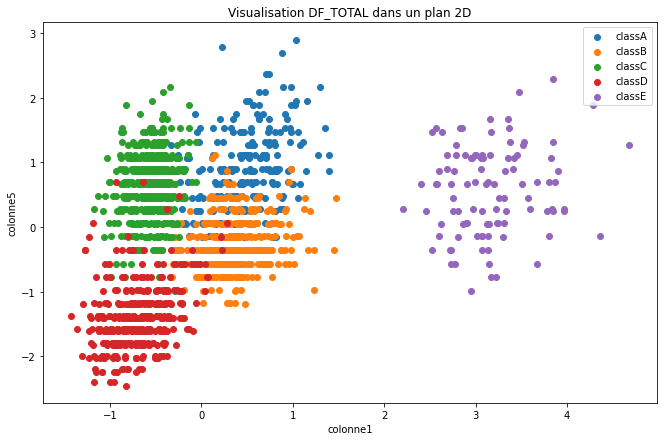

In [32]:
tracer_graph(DF_TOTAL,1,5,"Visualisation DF_TOTAL dans un plan 2D")

In [33]:
print(DF_TOTAL.describe())

                  0             1  ...             4             5
count  1.606000e+03  1.606000e+03  ...  1.606000e+03  1.606000e+03
mean   1.910054e-15 -8.951605e-16  ... -6.877764e-13 -1.911886e-15
std    9.996884e-01  9.996884e-01  ...  9.996884e-01  9.996884e-01
min   -1.503874e+00 -1.427920e+00  ... -6.251481e+00 -2.450217e+00
25%   -7.455964e-01 -6.318708e-01  ... -1.018685e+00 -5.642103e-01
50%   -1.229609e-01 -3.675734e-01  ...  6.227939e-01  6.445881e-02
75%    4.073590e-01  3.807999e-01  ...  6.575530e-01  6.931279e-01
max    4.566010e+00  4.676295e+00  ...  6.575530e-01  2.899596e+00

[8 rows x 6 columns]


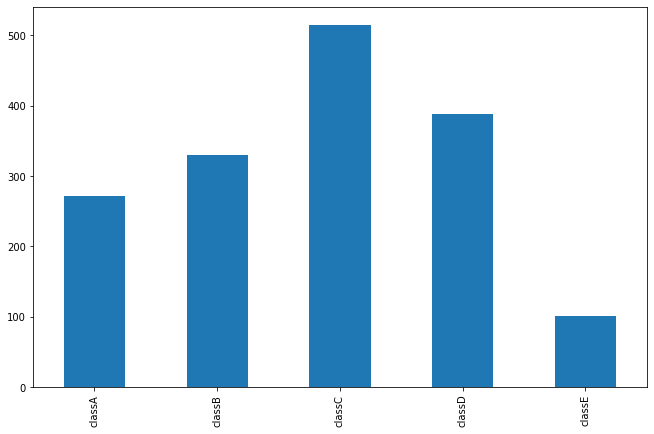

In [34]:
DF_TOTAL['Class'].value_counts().sort_index().plot(kind='bar')

#### Separation TRAIN/TEST

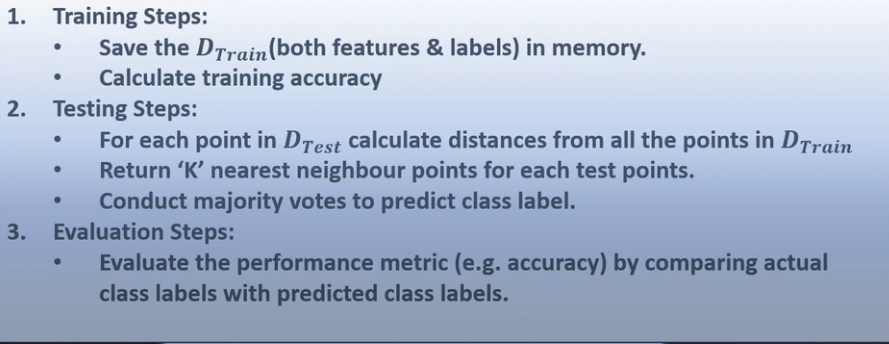

In [35]:
def train_test_split(df,test_size=0.3):
    train_df = df.sample(frac=(1-test_size), random_state=200)
    test_df = df[~df.index.isin(train_df.index)]
    return train_df,test_df,train_df.iloc[:,:-1].to_numpy() ,train_df.iloc[:,-1].to_numpy(), test_df.iloc[:,:-1].to_numpy(), test_df.iloc[:,-1].to_numpy()

DF_TRAIN,DF_TEST,X_TRAIN,Y_TRAIN, X_TEST, Y_TEST = train_test_split(DF_TOTAL)

print(np.shape(X_TRAIN))
print(np.shape(Y_TRAIN))
print(np.shape(X_TEST))
print(np.shape(Y_TEST))

(1124, 6)
(1124,)
(142, 6)
(142,)


In [36]:
# TODO : visualiser les values_count DF TRAIN et TEST

### IMPLEMENTATION


#### Algo KNN
- calculer distance entre 2 point
- renvoyer les k plus proches voisins
- predire la classe en fonctions des voisins

In [37]:
def distance(p1,p2): #distance euclidienne
    """
    Entrée:
        p1: un point
        p2: un deuxième point
        
    Sortie:
        renvoie la distance euclidienne entre les deux point """
    if len(p1) == len(p2):
        res_carre = 0
        for i in range(len(p1)):
            res_carre += ( p1[i] - p2[i] )**2
        return np.sqrt(res_carre)
    else:
        return None


p1 = X_TRAIN[0]
p2 = X_TRAIN[1]
distance(p1,p2)

1.2293320143319733

In [38]:
def knn(point, k=3):
    global X_TRAIN
    """
    Entrée:
        point: un point
        k: nombre de voisins les plus proches à utiliser(par défaut 3)
        
    Sortie:
        renvoie les k plus proches voisins, leurs indices """
    distances_voisins = [] 
    for index, p in enumerate(X_TRAIN): # pour chaque ligne ~ chq point du data

        comparison = p == point
        equal_arrays = comparison.all()
        if not equal_arrays:
            dist = distance(point,p) #distance entre p et le point étudié
            distances_voisins.append((dist,index))

    
    distances_voisins = sorted(distances_voisins) #tri selon le 1er arg du tuple, donc dist
    indices = [index for d,index in distances_voisins[:k]]
    return indices, X_TRAIN[indices] #retourne les indices des k plus proches voisins de point

p1 = X_TRAIN[2]
knn(p1,3)

([330, 251, 879],
 array([[ 0.45921502,  0.57045144, -0.14279842,  0.51873593,  0.62279391,
          0.2511681 ],
        [ 0.41854612,  0.58020355, -0.14279842,  0.54967592,  0.62279391,
          0.2511681 ],
        [ 0.44236576,  0.44611197, -0.14279842,  0.42332326,  0.62279391,
          0.2511681 ]]))

('classD', 100.0)

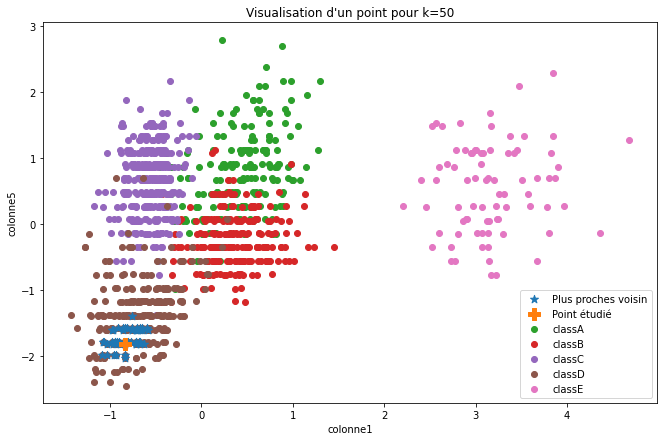

In [60]:
def prediction(point,k,afficherGraphe = False): #prediction pour un point
    """Pour un point, on envoie la classe des k plus proches voisins
    
    Entrée:
        point: le point
        X: nb de 1/2j d'absences lors du trimestre
        k: nombre de voisins les plus proches à utiliser(par défaut 3)
        
    Sortie:
        renvoie les classe la plus probable des k plus porches voisins"""

    indices_k_proches_voisins,k_proches_voisins = knn(point,k)

    # on va compter les classes des voisins
    compt = {}
    for i in indices_k_proches_voisins: # pour chq voisins
        
        laClassDuVoisin = Y_TRAIN[i] # on recup la class du voisins

        # on incrémente dans le dictionnaire
        if laClassDuVoisin in compt.keys(): 
            compt[laClassDuVoisin] = compt[laClassDuVoisin] + 1
        else:
            compt[laClassDuVoisin] = 1
   
    # obtenir pourcentage
    for key, val in compt.items():
        compt[key] = round(val/k*100,2)
    
    # trier par ordre croissant de pourcentage
    compt = sorted(compt.items(), key=lambda t: t[1])
    predict = compt[-1] # retourner le dernier element, la classe avec le plus grand pourcentage
 
    # afficher Graphe
    if afficherGraphe:
        # on commence par afficher notre point sur un graphique
        col_abs = 1
        col_ord = 5
       
        plt.scatter(X_TRAIN[indices_k_proches_voisins,col_abs], X_TRAIN[indices_k_proches_voisins,col_ord], label="Plus proches voisin", marker="*",zorder=8, s=70)
        plt.scatter(point[col_abs], point[col_ord], label="Point étudié", marker="P",zorder=10, s=150)
        tracer_graph(DF_TRAIN,col_abs,col_ord,"Visualisation d'un point pour k="+str(k),) # on affiche le point avec tous les autres point dans TRAIN !
    return predict # return classse prédit, % de ses voisins

    

p1 = X_TRAIN[2]
p2 = X_TEST[0]
prediction(p2,50,True)

In [40]:
def PredireClassYfromX(X,k): 
    """ Prédire les class d'un ensemble de point
    Entrée:
        X: les points (une point = une ligne)
        k: nombre de voisins les plus proches à prendre en compte
        
    Sortie:
        renvoie Y, les classes la plus probable des k plus porches voisins
    """
    Y_predicted = []
    print("PredireClassYfromX() Loading:",end="")
    for i, p in enumerate(X):
        print(f"{int(round(i/len(X)*100,1))}%",end=".. ")
        Y_predicted.append( prediction(p,k)[0] ) #la classe prédite pour le point p
    print()
    return np.array(Y_predicted)

In [41]:
def confusion(X_actual,X_predicted):
    """ Matrice de confusion
    Entrée:
        X_actual: les vrai classes
        X_predicted: les classes prédites
        
    Sortie:
        renvoie Y, les classes la plus probable des k plus porches voisins
    """
    go = {'x_Actual': X_actual,
          'x_Predicted':X_predicted
        }
    df = pd.DataFrame(go, columns=['x_Actual','x_Predicted'])
    confusion_matrix = pd.crosstab(df['x_Actual'], df['x_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    
    precision = 0
    for j in range(len(confusion_matrix.index)):
        precision += confusion_matrix.iloc[j][j]
    precision /= confusion_matrix.to_numpy().sum()
    return confusion_matrix,precision 

- __Accuracy__: The amount of correct classifications / the total amount of classifications.
- The __train__ accuracy: The accuracy of a model on examples it was constructed on.
- The __test__ accuracy is the accuracy of a model on examples it hasn't seen.
- Confusion matrix: A tabulation of the predicted class (usually vertically) against the actual class (thus horizontally).

#### • (Training Step)

In [42]:
K = 5
Y_TRAINPredicted = PredireClassYfromX(X_TRAIN,K)

PredireClassYfromX() Loading:0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 7%.. 7%.. 7%.. 7%.. 7%.. 7%.. 7%.. 7%.. 7%.. 7%.. 7%.. 8%.. 8%.. 8%.. 8%.. 8%.. 8%.. 8%.. 8%.. 8%.. 8%.. 8%.. 9%.. 9%.. 9%.. 9%.. 9%.. 9%.. 9%.. 9%.. 9%.. 9%.. 9%.. 10%.. 10%.. 10%.. 10%.. 10%.. 10%.. 10%.. 10%.. 10%.. 10%.. 10%.. 10%.. 11%.. 11%.. 11%.. 11%.. 11%.. 11%.. 11%.. 11%.. 11%.. 11%.. 11%.. 12%.. 12%.. 12%.. 12%.. 12%.. 12%.. 12%.. 12%.. 12%.. 12%.. 12%.. 13%.. 13%.. 13%.. 13%.. 13%.. 13%.. 13%.. 13%.. 13%.. 13%.. 13%.. 14%.. 14%.. 14%.. 14%.. 14%.. 14%.. 14%.. 14%.. 14%.. 14%.. 14%.. 14%.. 15%.. 15%.. 15%.. 15%.. 15%.. 15%.. 15%.. 15%.. 15%.. 15%.. 15%.. 16%

In [43]:
M, precis = confusion(Y_TRAIN,Y_TRAINPredicted)
print(f" --- Matrice de Confusion pour K={K} :\n", M)
print("\n --- Précision (train accuracy) :",round(precis*100,1),"%" )

 --- Matrice de Confusion pour K=5 :
 Predicted  classA  classB  classC  classD  classE
Actual                                           
classA        145      41      10       1       0
classB         26     190       3       5       0
classC          5       4     324       8       0
classD          2       9      11     261       0
classE          0       0       0       0      79

 --- Précision (train accuracy) : 88.9 %


In [44]:
def TrouverMeilleurK(X,Y_actual):
    k_choix = [2, 3, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 40, 50, 75, 100,150,200]
 
    abscisse = np.array(k_choix)
    ordonnee = []
    for k in abscisse:
        print("wait.. k=",k)
        Y_Predicted = PredireClassYfromX(X,k)
        ordonnee.append(confusion(Y_actual,Y_Predicted)[1])
    ymax = max(ordonnee)
    xpos = ordonnee.index(ymax)
    xmax = abscisse[xpos]
    print("end TrouverMeilleurK()")
    return abscisse,ordonnee,xmax, ymax


In [ ]:
ABS_k, ORD_accuracy, meilleurK,meilleurAccuracy = TrouverMeilleurK(X_TRAIN,Y_TRAIN)

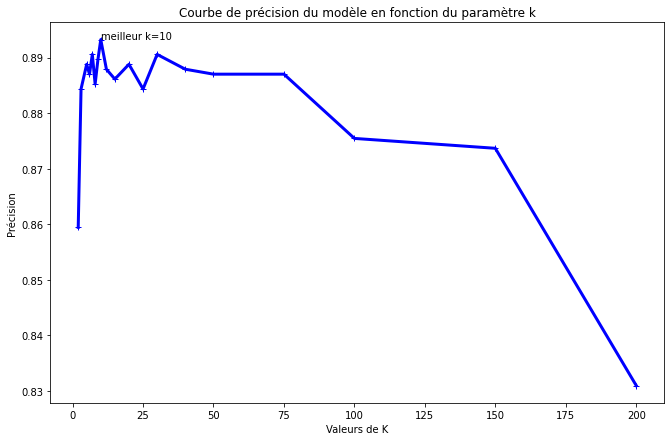

In [46]:
fig, ax = plt.subplots()
plt.title('Courbe de précision du modèle en fonction du paramètre k')
ax.plot(ABS_k,ORD_accuracy , "b-+", linewidth=3)
plt.ylabel('Précision')
plt.xlabel('Valeurs de K')

ax.annotate("meilleur k="+str(meilleurK), xy=( meilleurK,meilleurAccuracy ))

plt.show()

#### • (Test Step)

In [47]:
Y_TESTPredicted = PredireClassYfromX(X_TEST,meilleurK)

PredireClassYfromX() Loading:0%.. 0%.. 1%.. 2%.. 2%.. 3%.. 4%.. 4%.. 5%.. 6%.. 7%.. 7%.. 8%.. 9%.. 9%.. 10%.. 11%.. 12%.. 12%.. 13%.. 14%.. 14%.. 15%.. 16%.. 16%.. 17%.. 18%.. 19%.. 19%.. 20%.. 21%.. 21%.. 22%.. 23%.. 23%.. 24%.. 25%.. 26%.. 26%.. 27%.. 28%.. 28%.. 29%.. 30%.. 31%.. 31%.. 32%.. 33%.. 33%.. 34%.. 35%.. 35%.. 36%.. 37%.. 38%.. 38%.. 39%.. 40%.. 40%.. 41%.. 42%.. 43%.. 43%.. 44%.. 45%.. 45%.. 46%.. 47%.. 47%.. 48%.. 49%.. 50%.. 50%.. 51%.. 52%.. 52%.. 53%.. 54%.. 54%.. 55%.. 56%.. 57%.. 57%.. 58%.. 59%.. 59%.. 60%.. 61%.. 62%.. 62%.. 63%.. 64%.. 64%.. 65%.. 66%.. 66%.. 67%.. 68%.. 69%.. 69%.. 70%.. 71%.. 71%.. 72%.. 73%.. 73%.. 74%.. 75%.. 76%.. 76%.. 77%.. 78%.. 78%.. 79%.. 80%.. 81%.. 81%.. 82%.. 83%.. 83%.. 84%.. 85%.. 85%.. 86%.. 87%.. 88%.. 88%.. 89%.. 90%.. 90%.. 91%.. 92%.. 93%.. 93%.. 94%.. 95%.. 95%.. 96%.. 97%.. 97%.. 98%.. 99%.. 


#### • (Evaluation Step)

In [48]:
M, precis = confusion(Y_TEST,Y_TESTPredicted)
print(f" --- Matrice de Confusion pour K={meilleurK}:\n", M)
print("\n --- Précision (test accuracy) :",round(precis*100,1),"%" )

 --- Matrice de Confusion pour K=10:
 Predicted  classA  classB  classC  classD  classE
Actual                                           
classA         17       5       2       0       0
classB          2      31       0       0       0
classC          1       0      49       2       0
classD          0       0       1      24       0
classE          0       0       0       0       8

 --- Précision (test accuracy) : 90.8 %


In [49]:
print(f"--> Avec un K qui vaut {meilleurK} notre modèle à une précision de {round(precis*100,1)} % (ou {round((1-precis)*100,1)}% d'erreur) - avec nos X_TEST ")

--> Avec un K qui vaut 10 notre modèle à une précision de 90.8 % (ou 9.2% d'erreur) - avec nos X_TEST 


## FINAL TEST - RENDU

#### Importation et visualisation

In [50]:
DF_finalTest = normalized(pd.read_csv("finalTest.csv",header=None,names=[0,1,2,3,4,5]))
print(DF_finalTest.shape)
DF_finalTest.head()

(3000, 6)


,0,1,2,3,4,5
0,0.770102,0.891117,-0.732871,0.727935,-1.045799,0.527376
1,0.636911,0.755472,0.004424,0.777017,0.627479,0.497376
2,2.231390,2.656888,-1.101518,2.431387,0.627479,0.547376
3,-0.751592,-0.541974,-0.179900,-0.674060,0.627479,0.517376
4,-0.864951,-0.617223,-0.179900,-0.738232,0.627479,0.507376


In [51]:
print(DF_finalTest.describe())

                  0             1  ...             4            5
count  3.000000e+03  3.000000e+03  ...  3.000000e+03  3000.000000
mean   3.268478e-15  2.723479e-15  ... -1.834620e-12     0.493810
std    1.000000e+00  1.000000e+00  ...  1.000000e+00     0.048046
min   -1.462236e+00 -1.300204e+00  ... -6.065634e+00     0.377376
25%   -7.335156e-01 -6.273716e-01  ... -1.045799e+00     0.457376
50%   -1.697440e-01 -3.688032e-01  ...  6.274793e-01     0.497376
75%    4.007900e-01  3.484852e-01  ...  6.274793e-01     0.527376
max    4.078777e+00  4.778109e+00  ...  6.274793e-01     0.637376

[8 rows x 6 columns]


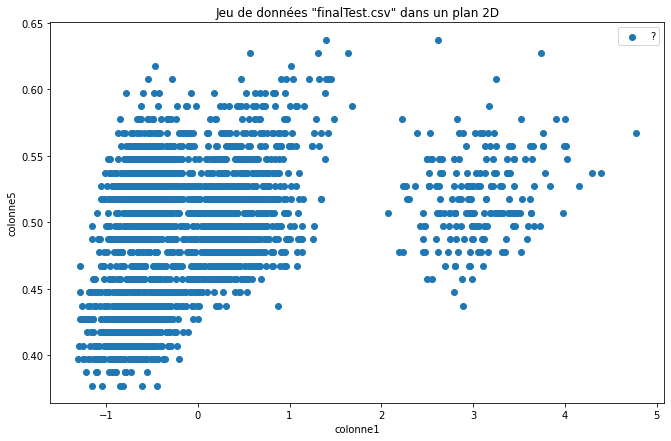

In [52]:
plt.title('Jeu de données "finalTest.csv" dans un plan 2D')
plt.scatter(DF_finalTest.iloc[:,1],DF_finalTest.iloc[:,5],zorder=1)
plt.xlabel("colonne"+str(1))
plt.ylabel("colonne"+str(5))  
plt.legend(['?'])
plt.show() 

#### Prédiction pour "finalTest.csv"

In [53]:
Y_FINALPredicted = PredireClassYfromX(DF_finalTest.to_numpy(),meilleurK)

PredireClassYfromX() Loading:0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 0%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 1%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 2%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 3%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 4%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 5%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6%.. 6

In [54]:
print(Y_FINALPredicted)

['classA' 'classB' 'classE' ... 'classB' 'classA' 'classB']


In [55]:
DF_finalTest['Class'] = Y_FINALPredicted

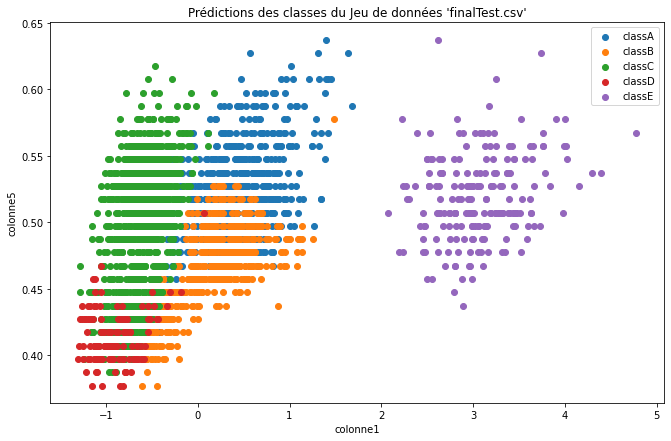

In [56]:
tracer_graph(DF_finalTest,1,5,"Prédictions des classes du Jeu de données 'finalTest.csv'")

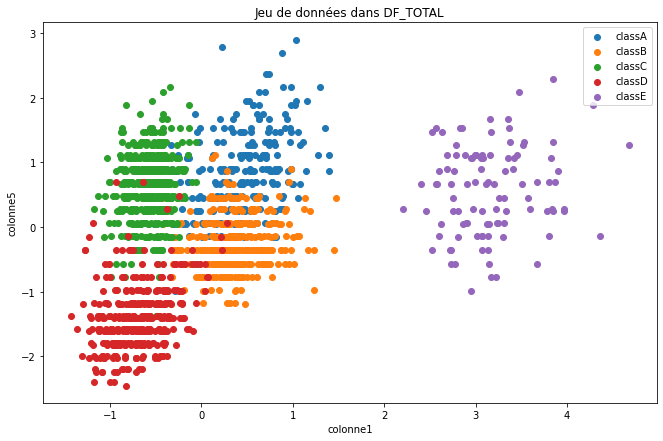

In [57]:
tracer_graph(DF_TOTAL,1,5, "Jeu de données dans DF_TOTAL")

Remarque : en comparant les 2 graphiques on observe une certaine cohérence dans les prédictions

#### sauvegarde dans un fichier txt

In [58]:
from google.colab import files

nomfichier = "saidsalimo_samples.txt"
with open(nomfichier,"w") as f:
    for p in Y_FINALPredicted:
        f.write(p + "\n")

files.download(nomfichier)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>